# Check the segment length from KO and WT

In [1]:
from datasets import Dataset
from param import *
from util import segment

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

datalist = ParamDir().data_path_list

## Segmenting based on continuous positions

In [2]:
segment_len = []
for data_dir in datalist: # a wild-type mouse
    mouse_type = "WT"
    if "KO" in str(data_dir): mouse_type = "KO"

    dataset = Dataset(data_dir, 1.0, False)

    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)
    segment_ind = segment(y_train)

    segment_len.append((segment_ind[0]+1, mouse_type))
    for i in range(1, len(segment_ind)):
        segment_len.append((segment_ind[i]-segment_ind[i-1], mouse_type))

In [3]:
df = pd.DataFrame(segment_len, columns=["length", "mouse type"])

<AxesSubplot:xlabel='mouse type', ylabel='length'>

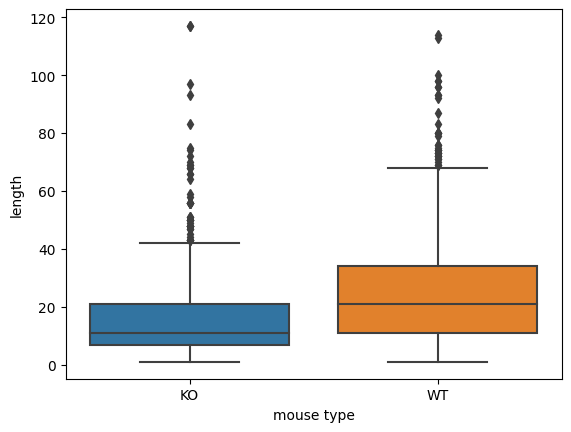

In [5]:
sns.boxplot(x="mouse type", y="length", data=df)

In [ ]:
df = pd.DataFrame(segment_len, columns=["length", "mouse type"])
df.groupby("mouse type").median()

,length
mouse type,
KO,11.0
WT,21.0


<AxesSubplot:xlabel='length', ylabel='Count'>

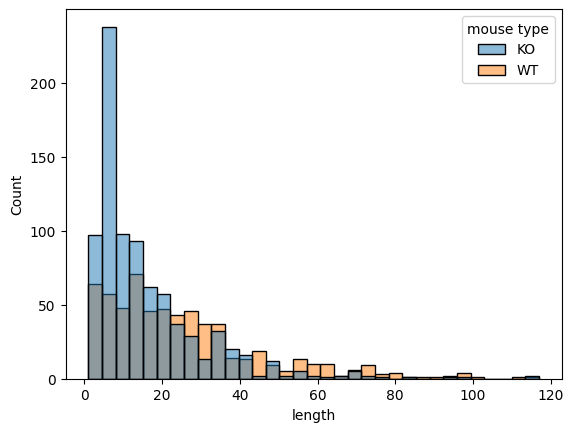

In [4]:
sns.histplot(x="length", data=df, hue="mouse type")

## Segment based on a given threshold K
1. len(orignal_segment) > K: segment it into sub-segments
    * abs(len(orignal_segment) % K - K ) < 9: delete
    * abs(len(orignal_segment) % K - K ) >= 9: zero padding
2. len(orignal_segment) < K: zero padding

In [6]:
def segment_with_threshold(a, K):
    """Segment the array further with threshold.

    Return
    ------
    A new array of segments.
    """
    if len(a) == 1: return [0]
    if len(a) == 2: return [1] if a[0]==a[1] else [0]
    seg_ind = []
    start = 0
    for end in range(len(a)-1):
        if (a[start] == a[end]) and (end-start+1<K):
            continue
        elif (a[start] == a[end]) and (end-start+1==K):
            seg_ind.append(end)
            start = end
            continue
        else:
            if (end-start+1<9):
                start = end
                continue # discard the segment where it's smaller than 9 time bins (3 seconds)
            else:
                seg_ind.append(end)
                start = end

    return seg_ind


In [7]:
K = 20
segment_len = []
for data_dir in datalist: # a wild-type mouse
    mouse_type = "WT"
    if "KO" in str(data_dir): mouse_type = "KO"

    dataset = Dataset(data_dir, 1.0, False)

    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8)
    segment_ind = segment_with_threshold(y_train, K)

    segment_len.append((segment_ind[0]+1, mouse_type))
    for i in range(1, len(segment_ind)):
        segment_len.append((segment_ind[i]-segment_ind[i-1], mouse_type))

In [9]:
df = pd.DataFrame(segment_len, columns=["length", "mouse type"])
df.groupby("mouse type").median()

,length
mouse type,
KO,19.0
WT,19.0


<AxesSubplot:xlabel='mouse type', ylabel='length'>

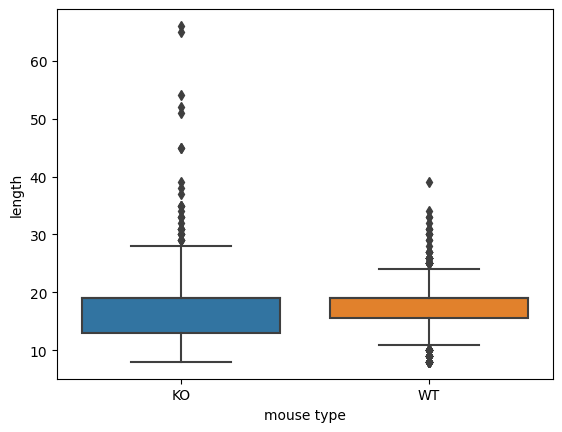

In [10]:
sns.boxplot(x="mouse type", y="length", data=df)

## Call the dataset

In [1]:
from datasets import ThresholdSegmentDataset
from param import *

datalist = ParamDir().data_path_list
data_dir = datalist[2]
dataset = ThresholdSegmentDataset(data_dir, 1.0, False)

(X_train, y_train), (X_test, y_test) = dataset.load_all_data(10, .8, 20)

In [7]:
X_test.shape

(8, 66, 19)